In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats

In [2]:
# the comments from top5 news articles from reddit
df_comments=pd.read_csv('df_comments.csv',index_col=[0])

In [3]:
# dropping \n 
df_comments[df_comments.columns]=df_comments[df_comments.columns].apply(lambda x:x.str.replace('\n',''))

In [4]:
# firstly I utilize Vader library to analyze sentiments for each post
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
def sentiment_scores_score(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    score=sentiment_dict['compound']
    return score

# function to return sentiments in words
def score_word(score):
    if score >= 0.05 :
        print("Positive")
 
    elif score <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")

In [5]:
# evaluating sentiments for each comment of the posts
df_comments['post1_sent']=df_comments['post1'].apply(lambda x:sentiment_scores_score(x))
df_comments['post2_sent']=df_comments['post2'].apply(lambda x:sentiment_scores_score(x))
df_comments['post3_sent']=df_comments['post3'].apply(lambda x:sentiment_scores_score(x))
df_comments['post4_sent']=df_comments['post4'].apply(lambda x:sentiment_scores_score(x))
df_comments['post5_sent']=df_comments['post5'].apply(lambda x:sentiment_scores_score(x))

In [6]:
# list of mean sentiment scores for each post
mean_scores=[]
mean_scores.append(df_comments['post1_sent'].mean())
mean_scores.append(df_comments['post2_sent'].mean())
mean_scores.append(df_comments['post3_sent'].mean())
mean_scores.append(df_comments['post4_sent'].mean())
mean_scores.append(df_comments['post5_sent'].mean())
np.round(mean_scores,2)

array([-0.13, -0.18, -0.02, -0.32,  0.07])

In [7]:
# printing classification of the sentiments
for i in mean_scores:
    score_word(i)

Negative
Negative
Neutral
Negative
Positive


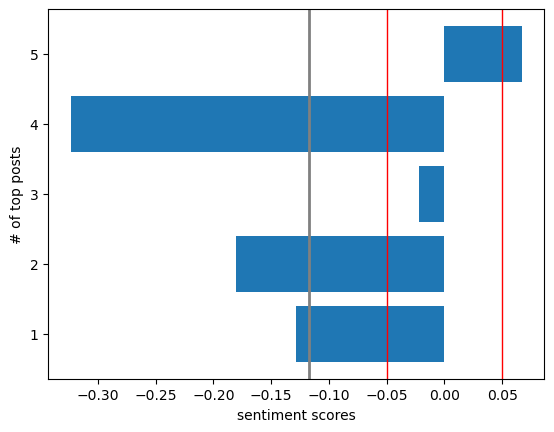

In [8]:
# plotting the results of the sentiments analysis
# averagely the sentiments of the posts are negative
index = np.arange(1,6)
plt.ylabel('# of top posts')
plt.xlabel('sentiment scores')
plt.barh(index,mean_scores)
plt.axvline(x=-0.05,linewidth=1, color='red')
plt.axvline(x=0.05,linewidth=1, color='red')
plt.axvline(x=np.mean(mean_scores),linewidth=2, color='grey',label='mean')
plt.show()

In [9]:
# it was a simple example of the sentiment analysis and now I'm going to experiment further
# with Spacy NLP library and vectors 
import spacy
from spacy.tokens import Span
from spacy.lang.en.examples import sentences 
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS

# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp =spacy.load("en_core_web_sm")

In [10]:
# printing the content of nlp pipeline
nlp.pipe_names, nlp.pipeline

(['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'],
 [('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x2a5b5e75d20>),
  ('tagger', <spacy.pipeline.tagger.Tagger at 0x2a5b5e76f80>),
  ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x2a5b5d92730>),
  ('attribute_ruler',
   <spacy.pipeline.attributeruler.AttributeRuler at 0x2a5b6093d00>),
  ('lemmatizer',
   <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x2a5b6091840>),
  ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x2a5b5d923b0>)])

In [11]:
# retrieving text, pos, dep tokens for the first comment
doc=nlp(df_comments.iloc[0,0])
[(token.text, token.pos_, token.dep_) for token in doc]

[('I', 'PRON', 'nsubj'),
 ('heard', 'VERB', 'ROOT'),
 ('of', 'ADP', 'prep'),
 ('a', 'DET', 'det'),
 ('similar', 'ADJ', 'amod'),
 ('suit', 'NOUN', 'pobj'),
 ('where', 'SCONJ', 'advmod'),
 ('a', 'DET', 'det'),
 ('security', 'NOUN', 'compound'),
 ('company', 'NOUN', 'nsubjpass'),
 ('was', 'AUX', 'auxpass'),
 ('hired', 'VERB', 'relcl'),
 ('to', 'PART', 'aux'),
 ('staff', 'VERB', 'xcomp'),
 ('guards', 'NOUN', 'dobj'),
 ('at', 'ADP', 'prep'),
 ('an', 'DET', 'det'),
 ('office', 'NOUN', 'pobj'),
 ('.', 'PUNCT', 'punct'),
 ('Check', 'VERB', 'compound'),
 ('IDs', 'PROPN', 'nsubj'),
 (',', 'PUNCT', 'punct'),
 ('log', 'NOUN', 'compound'),
 ('visitors', 'NOUN', 'appos'),
 (',', 'PUNCT', 'punct'),
 ('monitor', 'VERB', 'ROOT'),
 ('alarm', 'NOUN', 'compound'),
 ('systems', 'NOUN', 'dobj'),
 ('.', 'PUNCT', 'punct'),
 ('The', 'DET', 'det'),
 ('guards', 'NOUN', 'nsubj'),
 ('ignored', 'VERB', 'ROOT'),
 ('alarms', 'NOUN', 'dobj'),
 ('from', 'ADP', 'prep'),
 ('the', 'DET', 'det'),
 ('building', 'NOUN', 'nmo

In [12]:
# parsing sentences in the first comment
sentences=[sent.text for sent in doc.sents]
sentences

['I heard of a similar suit where a security company was hired to staff guards at an office.',
 'Check IDs, log visitors, monitor alarm systems.',
 'The guards ignored alarms from the building environmental system at their guard post all weekendServer room HVAC had failed and millions of dollars of server equipment was lost']

In [13]:
# retrieving ent labels from the comment
[(ent.text, ent.label_) for ent in doc.ents]

[('log visitors', 'ORG'), ('millions of dollars', 'MONEY')]

In [14]:
# retrieving chunks from the comment
[chunk.text for chunk in doc.noun_chunks]

['I',
 'a similar suit',
 'a security company',
 'guards',
 'an office',
 'Check IDs',
 'log visitors',
 'alarm systems',
 'The guards',
 'alarms',
 'the building environmental system',
 'their guard post',
 'all weekendServer room',
 'HVAC',
 'millions',
 'dollars',
 'server equipment']

In [15]:
# retrieving lemmas from the first comment if they are not in stop_words
lemmas = [token.lemma_ for token in doc if not token.is_stop]
lemmas

['hear',
 'similar',
 'suit',
 'security',
 'company',
 'hire',
 'staff',
 'guard',
 'office',
 '.',
 'check',
 'IDs',
 ',',
 'log',
 'visitor',
 ',',
 'monitor',
 'alarm',
 'system',
 '.',
 'guard',
 'ignore',
 'alarm',
 'building',
 'environmental',
 'system',
 'guard',
 'post',
 'weekendserver',
 'room',
 'HVAC',
 'fail',
 'million',
 'dollar',
 'server',
 'equipment',
 'lose']

In [16]:
# plotting the scheme of the sentence
sentence=nlp(sentences[1])
print(sentence)
displacy.render(sentence, style="dep")

Check IDs, log visitors, monitor alarm systems.


In [17]:
# visual representation of the ent of the sentence
displacy.render(sentence, style="ent")

In [18]:
# A function to retrieve similarity and vectors difference

def print_comparison(a, b):
    a = nlp(a)
    b = nlp(b)
    # Euclidean "L2" distance
    distance = np.linalg.norm(a.vector - b.vector)
    # Spacy similarity
    similarity = a.similarity(b)
    print("-" * 70)
    print("A: {}\nB: {}\nDistance: {}\nSimilarity: {}".format(a, b, distance, similarity))

In [19]:
# here are the first results of similarity and vectors difference 
# between the two posts
print_comparison(df_comments.iloc[0,0],df_comments.iloc[1,0])

----------------------------------------------------------------------
A: I heard of a similar suit where a security company was hired to staff guards at an office. Check IDs, log visitors, monitor alarm systems. The guards ignored alarms from the building environmental system at their guard post all weekendServer room HVAC had failed and millions of dollars of server equipment was lost
B: If this scientific freezer is anything like the ones at my institution, it's full of old PhD student samples waiting for the paper to be written (which never ends up being written).
Distance: 1.7841684818267822
Similarity: 0.5880666665616191


In [20]:
# further I'm going to clean the text and check whether the results change
# function to clean data

def cleanData(doc,stemming = False):
    doc = doc.lower()
    doc = nlp(doc)
    tokens = [tokens.lower_ for tokens in doc]
    tokens = [tokens for tokens in doc if (tokens.is_stop == False)]
    tokens = [tokens for tokens in tokens if (tokens.is_punct == False)]
    final_token = [token.lemma_ for token in tokens]
    final_token=[s.replace('\n','') for s in final_token]
    return " ".join(final_token)

In [21]:
# definitely the results for the cleaned text are more evident
# for the correct analysis of similarity and vectors difference the text is to be cleaned
com_cl0=cleanData(df_comments.iloc[0,0])
com_cl1=cleanData(df_comments.iloc[1,0])
print_comparison(com_cl0,com_cl1)

----------------------------------------------------------------------
A: hear similar suit security company hire staff guard office check ids log visitor monitor alarm system guard ignore alarm building environmental system guard post weekendserver room hvac fail million dollar server equipment lose
B: scientific freezer like one institution old phd student sample wait paper write end write
Distance: 2.3022780418395996
Similarity: 0.8437644132827581


In [22]:
# further I'm going to check how vectors distance is connected with similarity
# in other words, is is possible to predict similarity score basing upon vectors distance
# I'll modify the function to return the scores

def get_scores(a, b):
    a = nlp(a)
    b = nlp(b)
    # Euclidean "L2" distance
    distance = np.linalg.norm(a.vector - b.vector)
    # Spacy similarity
    similarity = a.similarity(b)
    return distance, similarity

In [23]:
df_comments

,post1,post2,post3,post4,post5,post1_sent,post2_sent,post3_sent,post4_sent,post5_sent
0,I heard of a similar suit where a security com...,Nazis. Are they fucking serious?Shit for brain...,You either wonder why the CDC is in Atlanta?It...,"So, someone called the officer a dumbass and t...",i went to a fairly strict catholic k-8 school ...,-0.8402,0.0000,-0.5574,-0.5859,0.2584
1,If this scientific freezer is anything like th...,"""Protesters with Nazi flags"" Almost there. W...",Yay now their hydroxychloroquine has a use,That dumbass probably cost the city of Phoenix...,My catholic school tried to enforce a dress co...,0.3612,-0.2263,0.5267,-0.5574,0.0000
2,Have to wonder how the janitor was trained and...,It’s 2023. How the fuck did we not learn the ...,"Oh. Hi, climate change. Seeing a lot of you la...",I wonder how quickly things would change if we...,> School founder Baker Mitchell had said the d...,-0.4404,-0.5443,0.3612,0.7096,0.6858
3,This beeping is not unusual. I have this happe...,How many of these idiots had grandfathers in W...,Next up are yellow and dengue fever.,">On August 2, 2022, McDonald continued to ride...",Looks like this has been pushed in North Carol...,0.7798,-0.3612,0.0000,-0.9694,0.3612
4,Had a janitorial staff clean the white board i...,Come on. Call a Nazi a Nazi.,Man Florida has been getting slapped around la...,> “Supervisors miss serious policy violations ...,So what's interesting here is that the substan...,-0.4497,0.0000,0.0000,-0.7964,-0.4235
5,That looks like 87 Field. Holy Shirley it is! ...,Somebody call Indiana Jones and The Blues Bros...,"Ah yes, the two states leading the fight again...",Better title - Phoenix police officer proves t...,"Charter Day School says it seeks to ""emphasize...",-0.5400,-0.5848,0.0258,-0.1027,0.9667
6,It sounds like it’s not a training issue but a...,"""People who write articles have no balls to ca...",The greatest biological threat to the US popul...,Good to know the DOJ has been “investigating” ...,">""School founder Baker Mitchell had said the d...",-0.3291,-0.4767,-0.7003,-0.3818,0.8385
7,This article leaves out that “the cleaner mist...,"These people are a waste of oxygen, plain and ...",Cameron county in Texas https://www.dshs.texas...,Cops are such shit heads,The dress code isn't the most egregious issue ...,0.2263,-0.4215,0.0000,-0.5574,-0.6597
8,Don’t let him in a data centre. Who turns of...,"When they tell you who they are, believe them",Texas: The One Star State.Florida: America's W...,"""Phoenix City police officers prove every sing...",I’m from this area. [This is the same charter ...,0.0000,0.0000,0.0000,-0.7964,0.0000
9,I would burn down the building if cultures I'd...,I will never understand this,"First Chagas disease, now Malaria. Hemorrhagic...",I guess the officers felt threatened. Sarcasm,The fact that a public charter school spent re...,-0.6597,0.0000,0.0000,-0.5994,-0.6399


In [27]:
# cleaning the comments for all posts
df_comments['post1_cl']=df_comments['post1'].apply(lambda x:cleanData(x))
df_comments['post2_cl']=df_comments['post2'].apply(lambda x:cleanData(x))
df_comments['post3_cl']=df_comments['post3'].apply(lambda x:cleanData(x))
df_comments['post4_cl']=df_comments['post4'].apply(lambda x:cleanData(x))
df_comments['post5_cl']=df_comments['post5'].apply(lambda x:cleanData(x))

In [38]:
# calculating similarity and distance for the cleaned comments for each post (vs the first comment for each post)
df_comments['post1_sim']=df_comments['post1_cl'].apply(lambda x:get_scores(df_comments.loc[0,'post1_cl'],x)[1])
df_comments['post1_dist']=df_comments['post1_cl'].apply(lambda x:get_scores(df_comments.loc[0,'post1_cl'],x)[0])
df_comments['post2_sim']=df_comments['post2_cl'].apply(lambda x:get_scores(df_comments.loc[0,'post1_cl'],x)[1])
df_comments['post2_dist']=df_comments['post2_cl'].apply(lambda x:get_scores(df_comments.loc[0,'post1_cl'],x)[0])
df_comments['post3_sim']=df_comments['post3_cl'].apply(lambda x:get_scores(df_comments.loc[0,'post1_cl'],x)[1])
df_comments['post3_dist']=df_comments['post3_cl'].apply(lambda x:get_scores(df_comments.loc[0,'post1_cl'],x)[0])
df_comments['post4_sim']=df_comments['post4_cl'].apply(lambda x:get_scores(df_comments.loc[0,'post1_cl'],x)[1])
df_comments['post4_dist']=df_comments['post4_cl'].apply(lambda x:get_scores(df_comments.loc[0,'post1_cl'],x)[0])
df_comments['post5_sim']=df_comments['post5_cl'].apply(lambda x:get_scores(df_comments.loc[0,'post1_cl'],x)[1])
df_comments['post5_dist']=df_comments['post5_cl'].apply(lambda x:get_scores(df_comments.loc[0,'post1_cl'],x)[0])

In [73]:
# retrieving distances and similarity scores
distances=pd.concat([df_comments['post1_dist'],df_comments['post2_dist'],
                     df_comments['post3_dist'],df_comments['post4_dist'],
                    df_comments['post5_dist']],axis=0)
similarity_scores=pd.concat([df_comments['post1_sim'],df_comments['post2_sim'],
                     df_comments['post3_sim'],df_comments['post4_sim'],
                    df_comments['post5_sim']],axis=0)

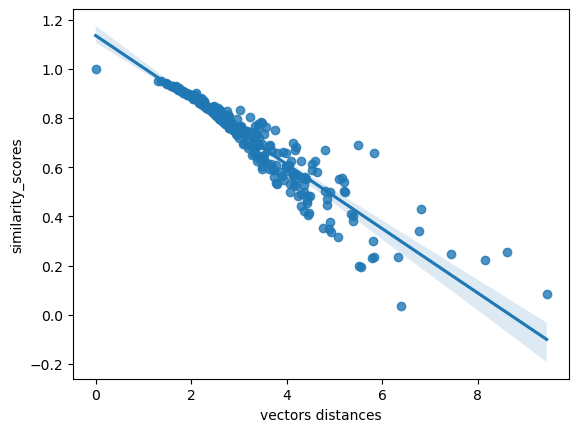

In [77]:
# plotting a chart which shows a strong negative correlation between the both values
sns.regplot(x=distances,y=similarity_scores)
plt.xlabel('vectors distances')
plt.ylabel('similarity_scores')
plt.show()

In [78]:
slope, intercept, r_value, p_value, std_err = stats.linregress(distances,similarity_scores)
print("slope - %.10s, intercept - %.10s, r_value - %.10s, p_value - %.10s, std_err - %.10s" %
     (slope, intercept, r_value, p_value, std_err))

slope - -0.1309030, intercept - 1.13538642, r_value - -0.9320809, p_value - 3.40440318, std_err - 0.00310768


In [83]:
# making the function to calculate similarity score for distances
def get_similarity_score(distance,slope=slope,intercept=intercept):
    similarity_score=slope*distance+intercept
    return similarity_score

In [84]:
# basing upon the linear regression we can get the similarity score for distances
get_similarity_score(5)

0.48087106817806646

In [141]:
# but the final formula to retrieve the precise similarity includes norms
def get_precise_similarity_score(text1,text2):
    object1 = nlp(text1)
    object2 = nlp(text2)
    similarity_score=np.dot(object1.vector,object2.vector)/(object1.vector_norm*object2.vector_norm)
    return similarity_score

In [143]:
# let's check the results for the function vs similarity method
object1 =nlp(df_comments['post1_cl'][0])
norm1=object1.vector_norm
object2 =nlp(df_comments['post1_cl'][1])
norm2=object2.vector_norm
object1.similarity(object2)

0.8437644132827581

In [144]:
# the results are the same (the exercise was just for fun to understand the mechanics)
get_precise_similarity_score(df_comments['post1_cl'][0],df_comments['post1_cl'][1])

0.8437644132827581